In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

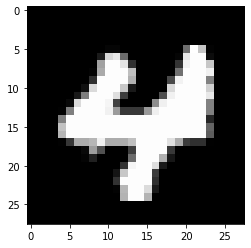

In [2]:
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt', 'int')
image = train_images[0, :] # prima imagine
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [11]:
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt','int')
test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt', 'int')

def values_to_bins (data_matrix, num_bins):
    bins = np.linspace(start = 0, stop = 255, num = num_bins)
    return np.digitize(data_matrix, bins) - 1

x_train = values_to_bins(train_images, 5)
x_test = values_to_bins(test_images, 5)

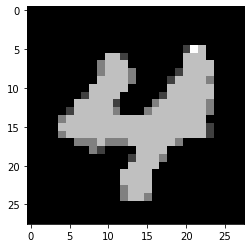

In [15]:
plt.imshow(np.reshape(x_train[0,:].astype(np.uint8), (28, 28)), cmap='gray')
plt.show()

In [16]:
nb = MultinomialNB()
nb.fit(x_train, train_labels)
print(nb.score(x_test, test_labels))

0.836


In [17]:
x_train_255 = values_to_bins(train_images, 255)
x_test_255 = values_to_bins(test_images, 255)

In [19]:
x_train_25 = values_to_bins(train_images, 25)
x_test_25 = values_to_bins(test_images, 25)

In [28]:
nb = MultinomialNB()
nb.fit(x_train_255, train_labels)
print(nb.score(x_test_255, test_labels))

0.846


In [22]:
nb = MultinomialNB()
nb.fit(x_train_25, train_labels)
print(nb.score(x_test_25, test_labels))

0.842


In [23]:
num_bins = [3, 5, 7, 9, 11]
for num in num_bins:

    train_data = values_to_bins(train_images, num)
    test_data = values_to_bins(test_images, num)
    nb = MultinomialNB()
    nb.fit(train_data, train_labels)
    print(nb.score(test_data, test_labels))

0.826
0.836
0.842
0.842
0.842


In [29]:
y_labels = test_labels

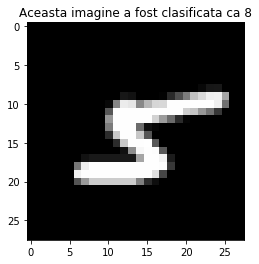

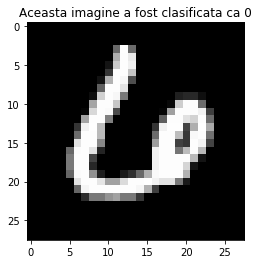

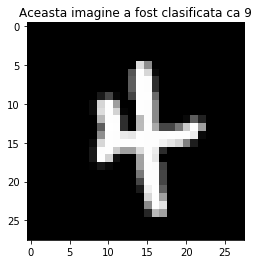

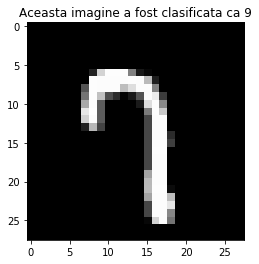

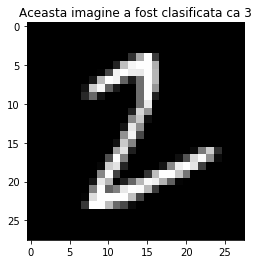

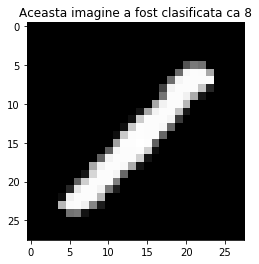

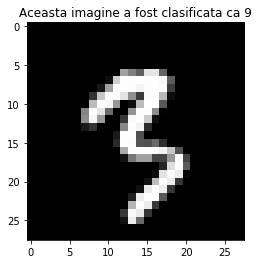

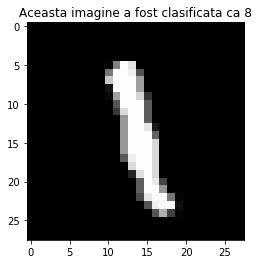

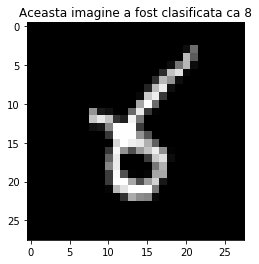

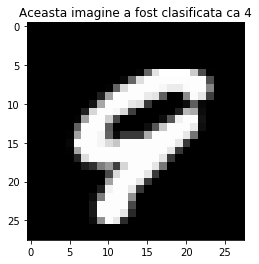

In [33]:
clf = MultinomialNB()

X_train = values_to_bins(train_images, 11)
X_test = values_to_bins(test_images, 11)

clf.fit(X_train, train_labels)
pred_labels = clf.predict(X_test)

wrongs = np.argwhere(pred_labels != test_labels)
for index in wrongs[:10]:
    image = test_images[index, :]
    image = np.reshape(image, (28, 28))

    plt.title("Aceasta imagine a fost clasificata ca " + str(pred_labels[index][0]))
    plt.imshow(image.astype(np.uint8), cmap='gray')
    plt.show()

In [39]:
def confusion_matrix(y_labels, y_pred):
    m = np.zeros((10, 10))
    for i, y in enumerate(y_pred):
        m[y_labels[i]][y] += 1
    return m

confusion_matrix(test_labels, pred_labels)

array([[51.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0., 48.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  0.],
       [ 2.,  0., 51.,  1.,  1.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  1., 49.,  0.,  0.,  0.,  0.,  0.,  3.],
       [ 0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  2., 10.],
       [ 1.,  0.,  0.,  9.,  0., 35.,  1.,  0.,  5.,  1.],
       [ 1.,  1.,  0.,  0.,  1.,  0., 43.,  0.,  2.,  0.],
       [ 0.,  1.,  0.,  0.,  2.,  0.,  0., 41.,  0.,  6.],
       [ 0.,  1.,  3.,  3.,  1.,  1.,  1.,  1., 34.,  1.],
       [ 0.,  0.,  1.,  1.,  5.,  0.,  0.,  0.,  0., 35.]])